In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from subprocess import check_output
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Simple liner regression based on Daily Growth and title_score1 abs_score1

In [3]:
df_combine = pd.read_csv('df_combine.csv')
X1 = df_combine[['title_score1']]
X1_train = X1[0:356]
X1_test = X1[357:]
X2 = df_combine[['abs_score1']]
X2_train = X2[0:356]
X2_test = X2[357:]
Y = df_combine[['Daily Growth']]
Y_train = Y[0:356]
Y_test = Y[357:]
Z = df_combine[['Adj Close']]
Z_train = Z[0:356]
Z_test = Z[357:]
T = df_combine[['Attributes']]
T_train = T[0:356]
T_test = T[357:]

In [4]:
# Use title_score1 and Daily Growth to make simple linear regression
#We should look at Adj. R-squared to judge accuracy of the mode. Here, since Adj. R-squared is so small, the model is not fitted to the dataset.
model = sm.OLS(Y_train, X1_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily Growth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7947
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.373
Time:                        21:55:48   Log-Likelihood:                 1371.5
No. Observations:                 356   AIC:                            -2741.
Df Residuals:                     355   BIC:                            -2737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
title_score1     0.0003      0.000      0.891   

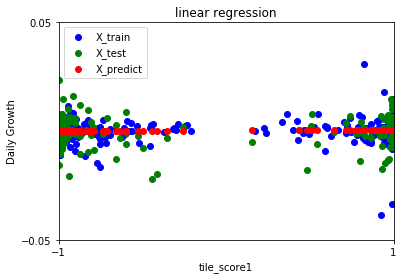

In [41]:
# Function to show the resutls of linear fit model
def show_linear_line(X_parameters_1,X_parameters_2, Y_parameters_1, Y_parameters_2):
# Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters_1, Y_parameters_1)
    plt.scatter(X_parameters_1,Y_parameters_1,color='blue',label = 'X_train')
    plt.scatter(X_parameters_2,Y_parameters_2,color='g',label = 'X_test')
    plt.scatter(X_parameters_2,regr.predict(X_parameters_2),color='red', label = 'X_predict')
    plt.xlim((-1,1))
    plt.ylim((-0.05,0.05))
    plt.xlabel('tile_score1')
    plt.ylabel('Daily Growth')
    plt.xticks((-1,1))
    plt.yticks((-0.05,0.05))
    plt.title(u'linear regression')
    plt.legend()
    plt.show()

show_linear_line(X1_train, X1_test, Y_train, Y_test)

In [6]:
# Use abs_score1 and Daily Growth to make simple linear regression
#We should look at Adj. R-squared to judge accuracy of the mode. Here, since Adj. R-squared is so small, the model is not fitted to the dataset.
model = sm.OLS(Y_train, X2_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily Growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.05625
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.813
Time:                        21:55:49   Log-Likelihood:                 1371.2
No. Observations:                 356   AIC:                            -2740.
Df Residuals:                     355   BIC:                            -2736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
abs_score1  6.678e-05      0.000      0.237      0.8

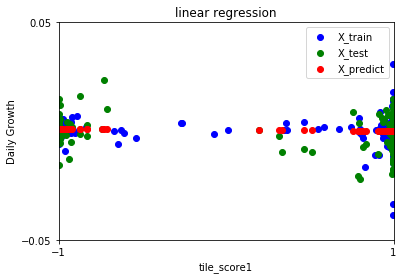

In [44]:
# Function to show the resutls of linear fit model
def show_linear_line(X_parameters_1,X_parameters_2, Y_parameters_1, Y_parameters_2):
# Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters_1, Y_parameters_1)
    plt.scatter(X_parameters_1,Y_parameters_1,color='blue',label = 'X_train')
    plt.scatter(X_parameters_2,Y_parameters_2,color='g',label = 'X_test')
    plt.scatter(X_parameters_2,regr.predict(X_parameters_2),color='red', label = 'X_predict')
    plt.xlim((-1,1))
    plt.ylim((-0.05,0.05))
    plt.xlabel('tile_score1')
    plt.ylabel('Daily Growth')
    plt.xticks((-1,1))
    plt.yticks((-0.05,0.05))
    plt.title(u'linear regression')
    plt.legend()
    plt.show()

show_linear_line(X2_train, X2_test, Y_train, Y_test)

In [10]:
#here, we can conclude that linear regression model does not fit our dataset.